# Analisi tamponi

In [1]:
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1
import pickle as pkl
import numpy as np

from aidam.aicharts import aidam_distribution_map

## Lettura dati

In [2]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 205
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-09-15T17:00:00


Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [3]:
grid_shape=(7,3)

posizioni=np.array(range(grid_shape[0]*grid_shape[1]))

posizioni=np.reshape(posizioni,grid_shape)

grid_cell={}
for r in range(grid_shape[0]):
    for c in range(grid_shape[1]):
        grid_cell[posizioni[r,c]]=(r,c)

## Tamponi effettuati

### Nazionale

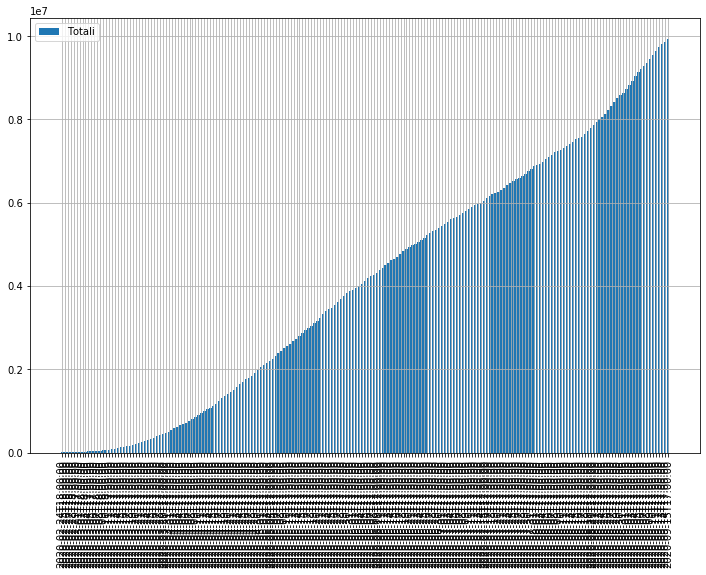

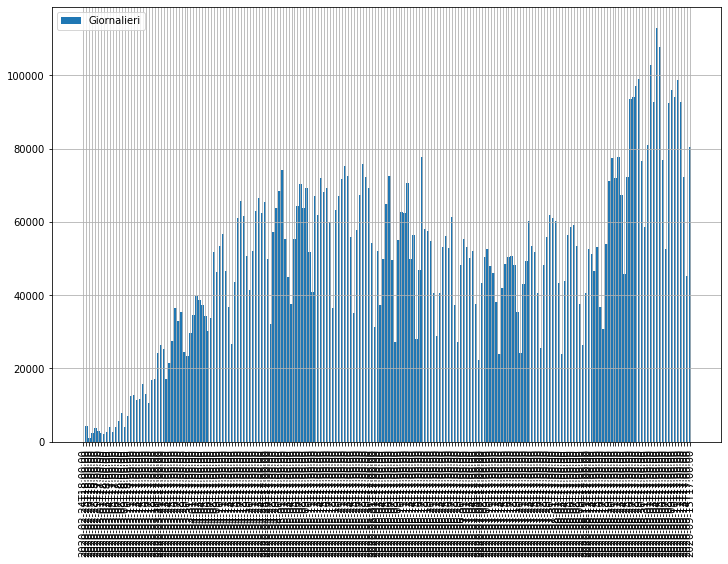

In [4]:
plt.figure(figsize=(12,8))
plt.bar(day_counter,trend['tamponi']['Italia'],label='Totali')
plt.xticks(day_counter,giorni,rotation=90)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.bar(day_counter,trend['tamponi_giornalieri']['Italia'],label='Giornalieri')
plt.xticks(day_counter,giorni,rotation=90)
plt.grid()
plt.legend()
plt.show()

#### Ultimi 7 giorni

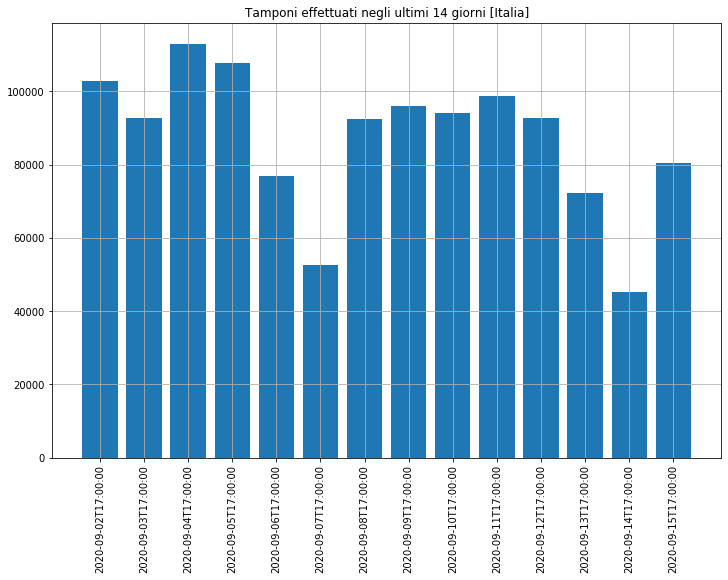

In [5]:
ultimi_giorni=14
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Tamponi effettuati negli ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['tamponi_giornalieri'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.show()

### Regionale

### Tamponi effettuati nell'ultima settimana nelle varie regioni

In [6]:
tamponi_ultima_sett=[np.sum(trend['tamponi_giornalieri'][r][-7:]) for r in regioni]

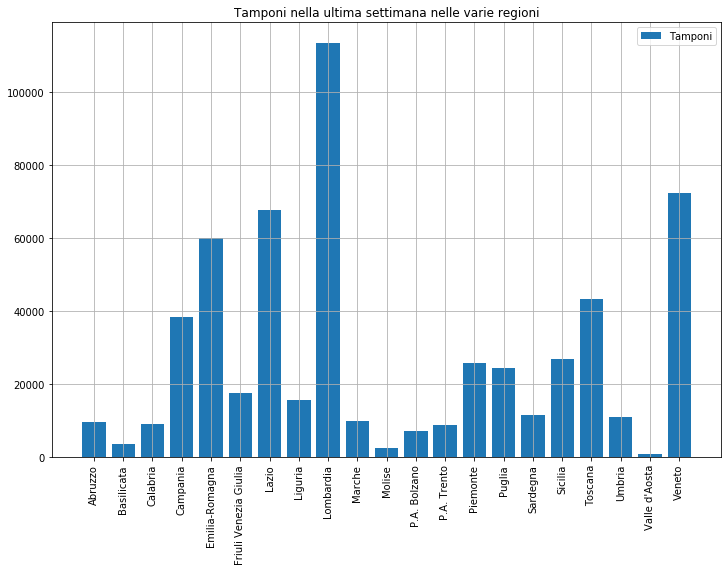

In [7]:
plt.figure(figsize=(12,8))
plt.title('Tamponi nella ultima settimana nelle varie regioni')
plt.bar(range(len(regioni)),tamponi_ultima_sett,label='Tamponi')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()

## Percentuale tamponi positivi

### Nazionale nel tempo

Percentuale attuale tamponi positivi:  1.53%


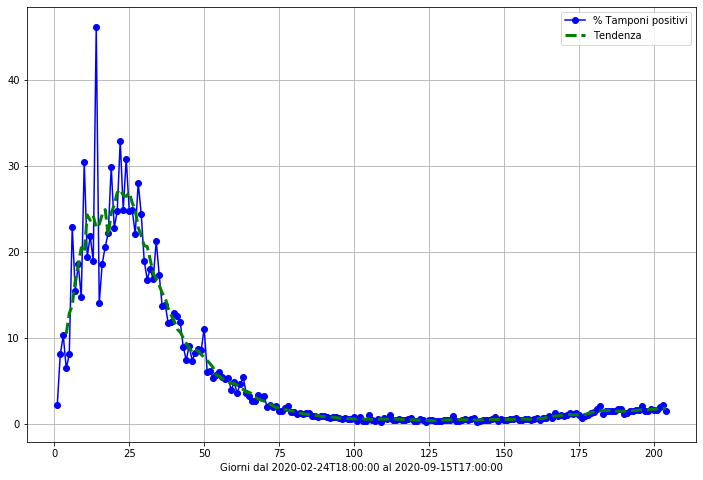

In [8]:
print('Percentuale attuale tamponi positivi: %5.2f%%'%trend['perc_tamponi_positivi']['Italia'][-1])

plt.figure(figsize=(12,8))
plt.plot(day_counter,trend['perc_tamponi_positivi']['Italia'],
         'bo-',
         label='% Tamponi positivi')
# metto anche la versione lisciata
plt.plot(day_counter,moving_function_rev1(trend['perc_tamponi_positivi']['Italia'],np.mean,3,3),
         'g--',
         label='Tendenza',linewidth=3)
plt.xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
plt.grid()
plt.legend()
plt.show()

### Adamento della percentuale dei tamponi positivi rispetto ai tamponi effettuati

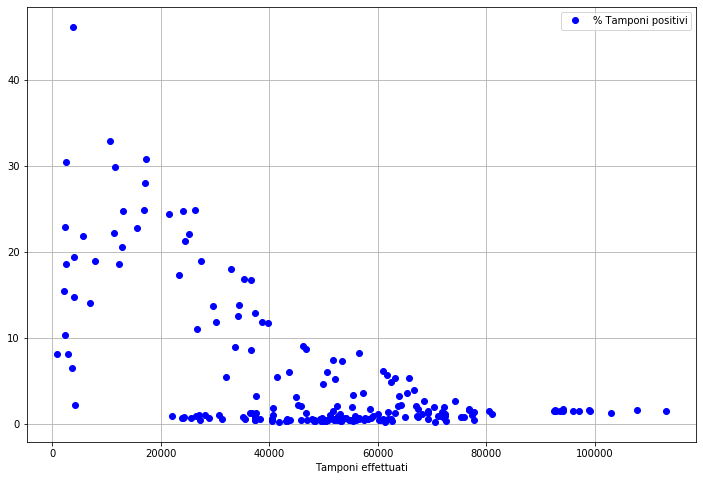

In [9]:
plt.figure(figsize=(12,8))
plt.plot(trend['tamponi_giornalieri']['Italia'],trend['perc_tamponi_positivi']['Italia'],
         'bo',
         label='% Tamponi positivi')

plt.xlabel('Tamponi effettuati')
plt.grid()
plt.legend()
plt.show()

### Nazionale ultimi giorni

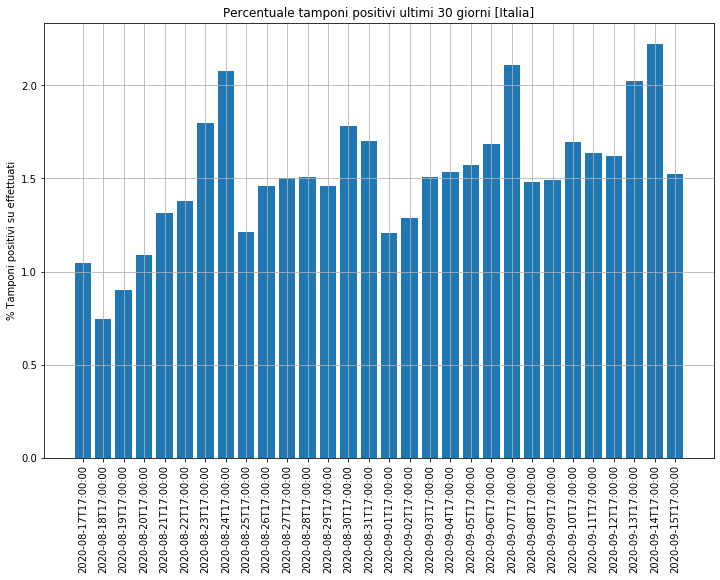

In [10]:
ultimi_giorni=30
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Percentuale tamponi positivi ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['perc_tamponi_positivi'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.ylabel('% Tamponi positivi su effettuati')
plt.show()

In [11]:
trend['perc_tamponi_positivi']['Italia'][-14:]

array([1.2878913 , 1.50555017, 1.53247557, 1.57350127, 1.68757156,
       2.10834776, 1.48263585, 1.49390562, 1.69558108, 1.63430421,
       1.61909693, 2.0209861 , 2.22472356, 1.52638573])

### Regionale nel tempo

Percentuale tamponi positivi nel tempo nelle varie regioni

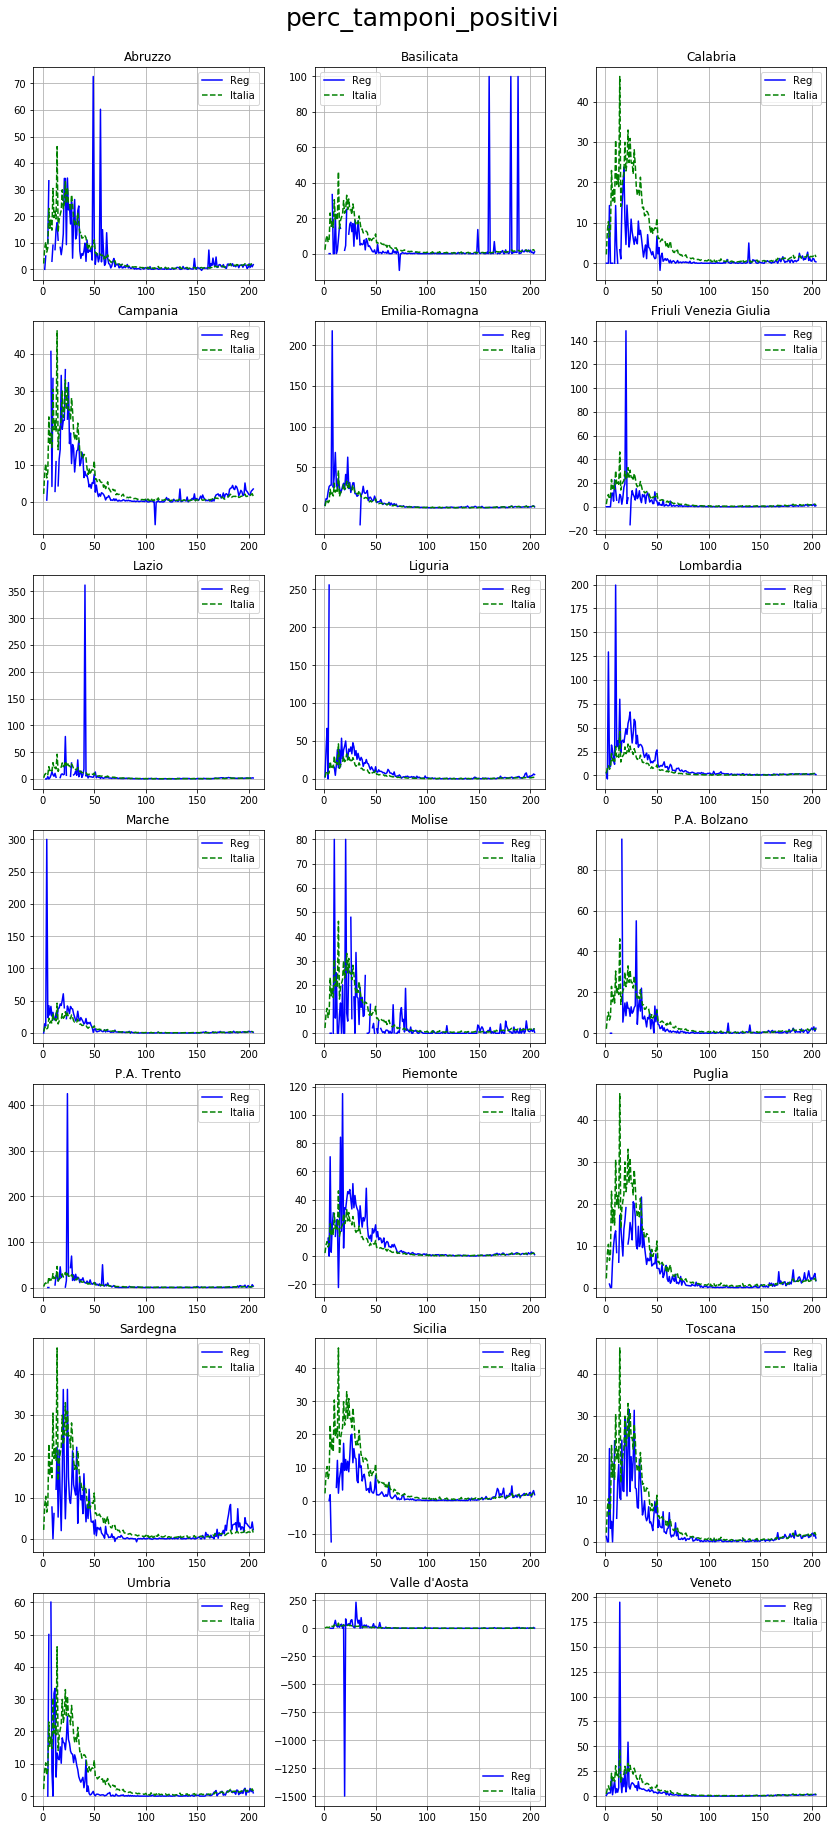

In [12]:
indicatori_selected=['perc_tamponi_positivi']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=(12,25))
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore][regione],'b-',label='Reg')
        ax[grid_cell[i][0],grid_cell[i][1]].set_title(regione)
        # plotto anche media italiana
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore]['Italia'],'g--',label='Italia')
        ax[grid_cell[i][0],grid_cell[i][1]].legend()
        ax[grid_cell[i][0],grid_cell[i][1]].grid()

### Percentuale tamponi positivi nelle varie regioni

#### Odierna (media ultimi giorni)

**Media** dei tamponi positivi in percentuale su quelli effettuati negli ultimi giorni nelle varie regioni.

In [13]:
actual_perc_pos=[np.nanmean(trend['perc_tamponi_positivi'][r][-7:]) for r in regioni]

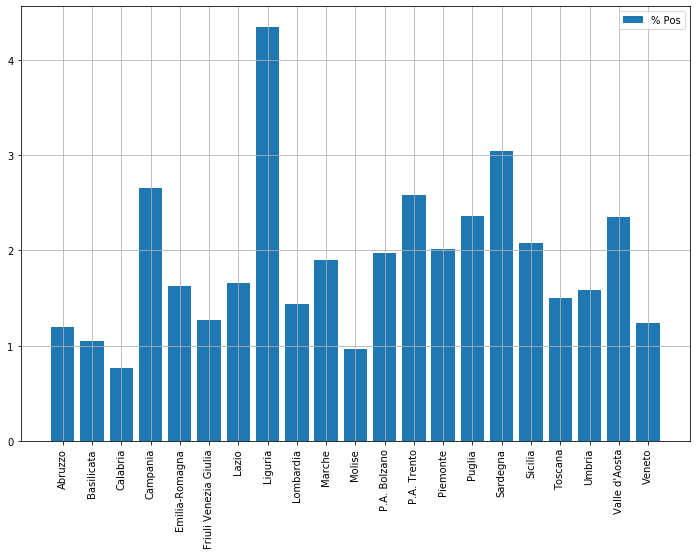

In [14]:
plt.figure(figsize=(12,8))
plt.bar(range(len(regioni)),actual_perc_pos,label='% Pos')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()

## Mappa tamponi

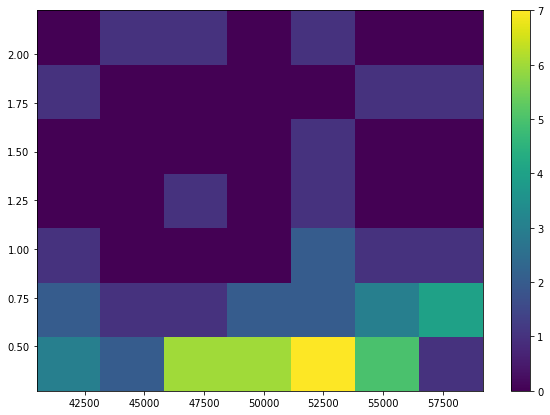

In [15]:
trend['perc_tamponi_positivi']['Italia'][0]=trend['perc_tamponi_positivi']['Italia'][1]

fig,ax=plt.subplots(figsize=(10,7))

temp=aidam_distribution_map(trend['tamponi_giornalieri']['Italia'],
                       trend['perc_tamponi_positivi']['Italia'],
                            plotax=ax,
                            nxbins=8,nybins=8,
                            yrange=(0,3),xrange=(40000,60000))

fig.colorbar(temp[1][3])

In [16]:
temp


(<matplotlib.axes._subplots.AxesSubplot at 0x201c7de1438>,
 (array([[3., 2., 1., 0., 0., 1., 0.],
         [2., 1., 0., 0., 0., 0., 1.],
         [6., 1., 0., 1., 0., 0., 1.],
         [6., 2., 0., 0., 0., 0., 0.],
         [7., 2., 2., 1., 1., 0., 1.],
         [5., 3., 1., 0., 0., 1., 0.],
         [1., 4., 1., 0., 0., 1., 0.]]),
  array([40485., 43158., 45831., 48504., 51177., 53850., 56523., 59196.]),
  array([0.27229083, 0.55120979, 0.83012875, 1.10904771, 1.38796668,
         1.66688564, 1.9458046 , 2.22472356]),
  <matplotlib.collections.QuadMesh at 0x201c80ece80>))